In [1]:
from model import Model 
from pathlib import Path
import torch
PATH = Path("model.pth")

In [3]:
model = Model()
# model.load_state_dict(torch.load(PATH))

In [4]:
param_size = 0
for param in model.parameters():
    param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in model.buffers():
    buffer_size += buffer.nelement() * buffer.element_size()

size_all_mb = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))

model size: 909.476MB


In [5]:
model.to('cuda')

EnsambleModel(
  (e): pre_trained_encoder(
    (e1): encoder_block(
      (conv): conv_block(
        (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU()
      )
      (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (e2): encoder_block(
      (conv): conv_block(
        (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [6]:
print(f"gpu used {torch.cuda.max_memory_allocated(device=None)} memory")

gpu used 1203285504 memory


In [10]:
print(f"gpu used {torch.cuda.max_memory_allocated(device=None)/ (1024 ** 3)} GB memory")

gpu used 1.9784507751464844 GB memory


torch.Size([1, 3, 512, 1024])
OOD: True, mean_softmax_score_of_image: 0.05229360982775688


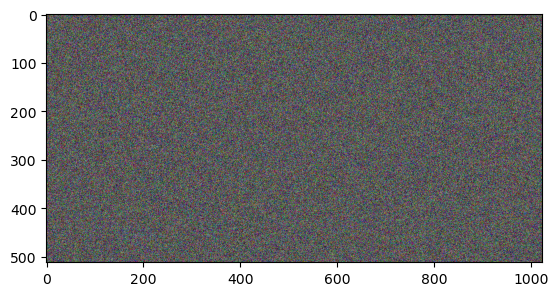

In [11]:
from process_data import preprocess
import matplotlib.pyplot as plt
import PIL
import numpy as np
target = [512,1024]
random_data = np.random.randint(0, 180, (512, 1024, 3), dtype=np.uint8)

# Create a PIL image from the numpy array
im = PIL.Image.fromarray(random_data)
input = preprocess(im)
print(input.shape)
input = input.to('cuda')
model(input)
plt.imshow(im) 

In [ ]:
# for validation it is needed to know if the model is abler to flag for ood, due to the limited upload count for ood i have excluded activation scores that could be used for calibration.
class ood_counter():
    ood_images_count = 0
    id_images_count = 0 
    
    @classmethod
    def percentage_ood(cls):
        return cls.ood_images_count/(cls.ood_images_count+cls.id_images_count)



In [ ]:
ood = True
if ood:
    ood_counter.ood_images_count += 1
    print(f"Percentage of OOD images: {ood_counter.percentage_ood()}")
else:
    ood_counter.id_images_count += 1


Percentage of OOD images: 1.0
